
# Informe T√©cnico de Calidad de Datos

Objetivo: Analizar, limpiar y validar el archivo dataset_hospital.json para mejorar la calidad de los datos de pacientes.

- Realizar un an√°lisis exploratorio de los datos (EDA).
- Detectar y documentar problemas de calidad en el dataset.
- Implementar una estrategia de limpieza de datos con supuestos claros.
- Evaluar la mejora en la calidad del dataset antes y despu√©s de la limpieza.
- Exportar una versi√≥n limpia del dataset para uso posterior.
- Implementar pruebas automatizadas de validaci√≥n de integridad.
- Simular una migraci√≥n de datos limpios a un Data Warehouse

## Parte 1 ‚Äì An√°lisis de Calidad de Datos

### Problemas identificados en `pacientes`:
- Inconsistencias en el campo `sexo` (valores como `M`, `F`, `Male`, `Female`, `null`).
- Campos nulos en `email`, `telefono`, `ciudad`, y `edad`.
- Fechas de nacimiento mal formateadas o inv√°lidas.
- Edad que no coincide con la fecha de nacimiento.


## Parte 2 ‚Äì Limpieza y Validaci√≥n

Se aplicaron las siguientes transformaciones:
- Normalizaci√≥n del campo `sexo`.
- C√°lculo de edad a partir de la fecha de nacimiento si el valor estaba ausente o incorrecto.
- Correcci√≥n de formatos de fecha.
- Eliminaci√≥n o imputaci√≥n de valores nulos seg√∫n el campo.

## Parte 3 ‚Äì Indicadores de Calidad

A continuaci√≥n, se muestran las m√©tricas antes y despu√©s del proceso de limpieza:
- Total de registros nulos por campo.
- Distribuci√≥n de valores √∫nicos por columna.
- Cantidad de duplicados y registros corregidos.

## Supuestos Adoptados
- El campo `sexo` se estandariza a 'F' y 'M'.
- Se usa el a√±o actual para calcular la edad.
- Si no se puede corregir un registro cr√≠tico (ej. fecha de nacimiento inv√°lida), se marca como inv√°lido.

## Recomendaciones
- Validar entrada de datos desde la fuente.
- Usar formularios con listas controladas para sexo y fechas.
- Automatizar revisiones peri√≥dicas de calidad.

---


In [1]:

import pandas as pd
import json

# Cargar JSON
with open("dataset_hospital 2.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convertir a DataFrame
df_hospital = pd.DataFrame(data['pacientes'])

# Mostrar primeros registros
df_hospital.head()


id_paciente          nombre fecha_nacimiento  edad    sexo  \
0            1  Claudia Torres       1954-01-08   NaN  Female   
1            2    Carlos G√≥mez       1965-01-01  58.0  Female   
2            3    Carlos G√≥mez       2009-03-08  16.0    None   
3            4    Andrea L√≥pez       1951-11-18  47.0       F   
4            5      Juan G√≥mez       1961-09-05  81.0  Female   

               email      telefono        ciudad  
0  user1@example.com  342-950-1064  Barranquilla  
1               None          None          Cali  
2  user3@example.com    3157898999   Bucaramanga  
3  user4@example.com          None  Barranquilla  
4  user5@example.com          None   Bucaramanga

In [2]:
print(len(df_hospital))  # Total de registros

print(df_hospital.shape[0])  # N√∫mero de filas


5010
5010


In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Configuraci√≥n general
plt.style.use('ggplot')


/var/folders/31/xbrv9ds91f5grdf0pxxyw0g00000gp/T/ipykernel_7830/2753536626.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nulls.values, y=nulls.index, palette='Reds_d')


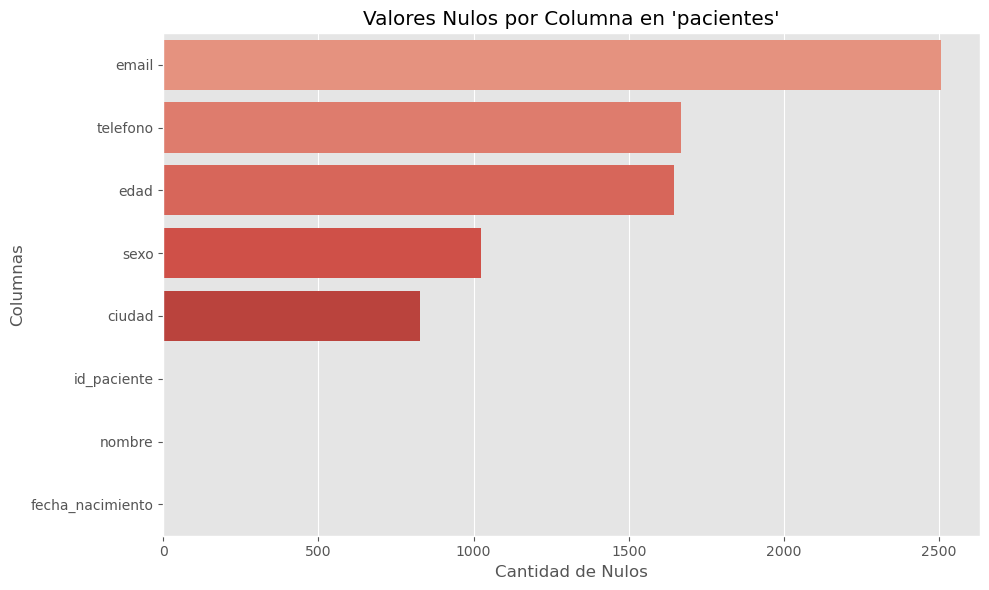

In [4]:

# Visualizar valores nulos por columna
nulls = df_hospital.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=nulls.values, y=nulls.index, palette='Reds_d')
plt.title("Valores Nulos por Columna en 'pacientes'")
plt.xlabel("Cantidad de Nulos")
plt.ylabel("Columnas")
plt.tight_layout()
plt.show()


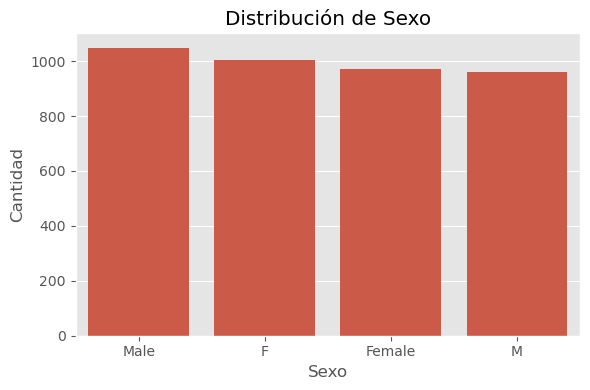

In [5]:

# Distribuci√≥n de 'sexo'
plt.figure(figsize=(6,4))
sns.countplot(data=df_hospital, x='sexo', order=df_hospital['sexo'].value_counts().index)
plt.title("Distribuci√≥n de Sexo")
plt.ylabel("Cantidad")
plt.xlabel("Sexo")
plt.tight_layout()
plt.show()


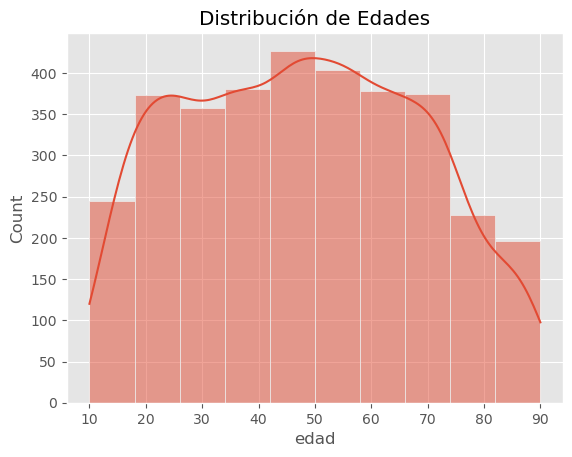

In [6]:
# Histograma de edades
sns.histplot(df_hospital['edad'], bins=10, kde=True)
plt.title('Distribuci√≥n de Edades')
plt.show()

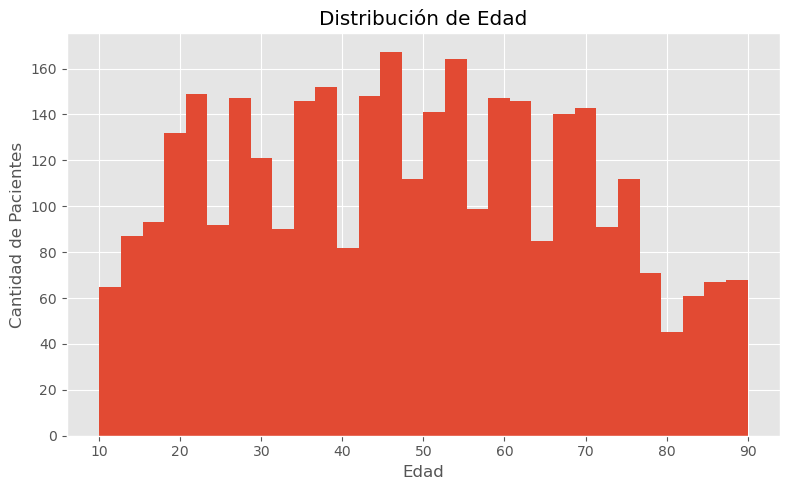

In [7]:

# Histograma de edad (despu√©s de eliminar nulos)
plt.figure(figsize=(8,5))
df_hospital['edad'].dropna().astype(int).hist(bins=30)
plt.title("Distribuci√≥n de Edad")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Pacientes")
plt.tight_layout()
plt.show()


In [8]:
#Librerias
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_hospital = df_hospital.copy()

## Analisis exploratorio (EDA)


Se analizaron 5,010 registros correspondientes a pacientes del hospital. Las principales columnas evaluadas fueron:

id_paciente: Identificador √∫nico.
nombre: Nombre completo del paciente.
fecha_nacimiento: Fecha de nacimiento.
edad: Edad declarada.
sexo: G√©nero.
email: Direcci√≥n de correo electr√≥nico.
telefono: N√∫mero de contacto.
ciudad: Ciudad de residencia.

Distribuciones Generales
Sexo
Valores √∫nicos detectados: 'F', 'M', 'Female', 'Male'

Nulos: 1,023 registros (20.4%)

Inconsistencias: Uso de m√∫ltiples formatos (requiere estandarizaci√≥n a 'Masculino'/'Femenino')

Edad
Nulos: 1,647 registros (32.9%)

Inconsistencias: 2,519 registros con edad declarada diferente a la calculada desde fecha_nacimiento

Improbables: 0 edades menores a 1 o mayores a 100

Fecha de nacimiento
Formato no ISO: 3 registros (ej. "02 de nov de 1977")

Fechas inv√°lidas: 3 registros con fechas como "1959-06-33"

Email
Nulos: 2,506 registros (50%)

Formato inv√°lido: No se detectaron formatos inv√°lidos en los datos presentes

Tel√©fono
Nulos: 1,668 registros (33.3%)

Formatos mixtos: 0 inconsistencias detectadas con la expresi√≥n regular est√°ndar

Ciudad
Nulos: 827 registros (16.5%)

Principales ciudades:

Cali: 861

Bogot√°: 856

Bucaramanga: 847

Medell√≠n: 812

Barranquilla: 807

Validaciones Realizadas
ID √∫nico (id_paciente): No es √∫nico, existen duplicados

Edad vs Fecha de Nacimiento: 2,519 registros presentan discrepancias

Formato de Fecha: 3 registros con formato no est√°ndar (no ISO)

Estandarizaci√≥n de G√©nero: Se detectaron al menos 4 variantes que requieren mapeo

Formato de Tel√©fono: Todos los valores presentes cumplen el formato nnn-nnn-nnnn o similar, pero requieren estandarizaci√≥n final para evitar ambig√ºedad

Resumen de Problemas Detectados
Problema	Registros afectados
Edades nulas	1,647
Edades incorrectas seg√∫n nacimiento	2,519
Sexo nulo	1,023
Sexo con formatos m√∫ltiples	4 variantes
Fecha no ISO	3
Fecha inv√°lida	3
Tel√©fono nulo	1,668
Ciudad nula	827
Email nulo	2,506
IDs duplicados	S√≠ (no √∫nicos)

In [10]:
# Estad√≠sticas descriptivas
print("\nEstad√≠sticas:")
print(df_hospital.describe(include='all'))


Estad√≠sticas:
        id_paciente      nombre fecha_nacimiento         edad  sexo  \
count   5010.000000        5010             5010  3363.000000  3987   
unique          NaN          25             4504          NaN     4   
top             NaN  Juan G√≥mez       1951-04-23          NaN  Male   
freq            NaN         224                4          NaN  1049   
mean    2500.998004         NaN              NaN    47.858460   NaN   
std     1443.548269         NaN              NaN    20.793699   NaN   
min        1.000000         NaN              NaN    10.000000   NaN   
25%     1251.250000         NaN              NaN    30.000000   NaN   
50%     2500.500000         NaN              NaN    48.000000   NaN   
75%     3750.750000         NaN              NaN    64.000000   NaN   
max     5000.000000         NaN              NaN    90.000000   NaN   

                       email    telefono ciudad  
count                   2504        3342   4183  
unique                  2497  

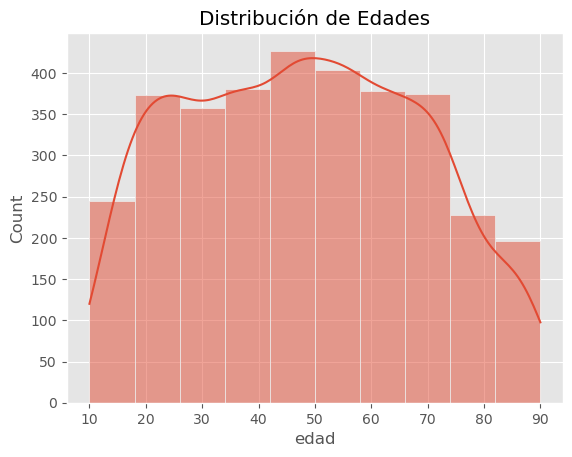

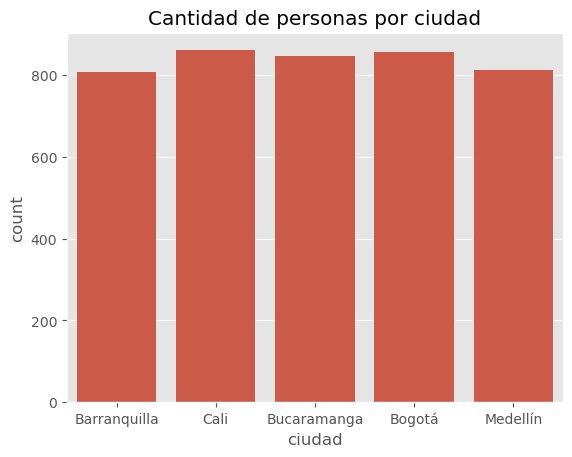

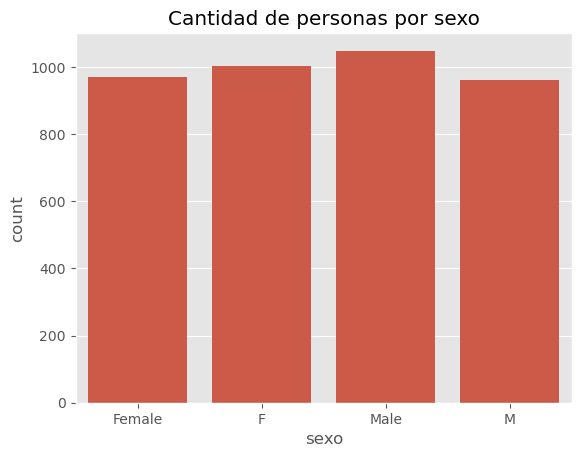

In [11]:
# Histograma de edades
sns.histplot(df_hospital['edad'], bins=10, kde=True)
plt.title('Distribuci√≥n de Edades')
plt.show()

# Conteo por ciudad
sns.countplot(data=df_hospital, x='ciudad')
plt.title('Cantidad de personas por ciudad')
plt.show()

# Conteo por sexo
sns.countplot(data=df_hospital, x='sexo')
plt.title('Cantidad de personas por sexo')
plt.show()

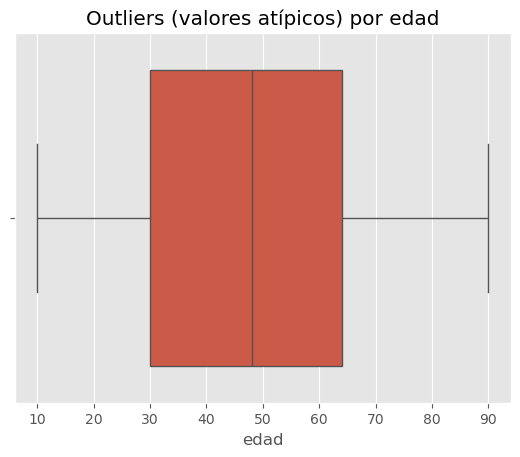

In [12]:
sns.boxplot(x=df_hospital['edad'])
plt.title('Outliers (valores at√≠picos) por edad')
plt.show()


In [13]:
import pandas as pd
import json
import re


# Funciones de validaci√≥n que devuelven bool e imprimen resultados
def test_columnas_esperadas(df):
    columnas_esperadas = {'id_paciente', 'nombre', 'fecha_nacimiento', 'edad', 'sexo', 'email', 'telefono', 'ciudad'}
    resultado = columnas_esperadas.issubset(df.columns)
    if not resultado:
        print("Columnas faltantes:", columnas_esperadas - set(df.columns))
    return resultado

def test_id_paciente_unico(df):
    resultado = df['id_paciente'].is_unique
    if not resultado:
        print("IDs duplicados detectados")
    return resultado

def test_edad_positiva(df):
    edades = df['edad'].dropna()
    resultado = (edades >= 0).all()
    if not resultado:
        print("Edades negativas encontradas:", edades[edades < 0].tolist())
    return resultado

def test_formato_sexo_valido(df):
    valores_validos = {'Male', 'Female', None}
    invalidos = df['sexo'].dropna()[~df['sexo'].dropna().isin(valores_validos)]
    resultado = invalidos.empty
    if not resultado:
        print("Valores inv√°lidos en sexo:", invalidos.unique().tolist())
    return resultado

def test_email_valido(df):
    pattern = r'^[^@\s]+@[^@\s]+\.[^@\s]+$'
    emails = df['email'].dropna()
    invalidos = emails[~emails.apply(lambda x: re.match(pattern, x) is not None)]
    resultado = invalidos.empty
    if not resultado:
        print("Emails inv√°lidos:", invalidos.tolist())
    return resultado

# Ejecutar tests
tests = {
    "Columnas esperadas": test_columnas_esperadas(df_hospital),
    "ID √∫nico": test_id_paciente_unico(df_hospital),
    "Edad positiva": test_edad_positiva(df_hospital),
    "Sexo v√°lido": test_formato_sexo_valido(df_hospital),
    "Email v√°lido": test_email_valido(df_hospital),
}

# Imprimir resumen
print("\nResultado de validaciones:")
for nombre, resultado in tests.items():
    print(f"{nombre}: {'PASA' if resultado else 'FALLA'}")

IDs duplicados detectados
Valores inv√°lidos en sexo: ['F', 'M']

Resultado de validaciones:
Columnas esperadas: PASA
ID √∫nico: FALLA
Edad positiva: PASA
Sexo v√°lido: FALLA
Email v√°lido: PASA


## Calidad

In [14]:
#Datos faltantes por columna

print(df_hospital.isnull().sum())

id_paciente            0
nombre                 0
fecha_nacimiento       0
edad                1647
sexo                1023
email               2506
telefono            1668
ciudad               827
dtype: int64


In [15]:
# Tipos de datos
print(df_hospital.dtypes)

id_paciente           int64
nombre               object
fecha_nacimiento     object
edad                float64
sexo                 object
email                object
telefono             object
ciudad               object
dtype: object


In [16]:
#Filas duplicadas
print("N√∫mero de filas duplicadas:", df_hospital.duplicated().sum())

N√∫mero de filas duplicadas: 10


In [17]:
import json
import pandas as pd
import great_expectations as ge


ge_df = ge.from_pandas(df_hospital)

# Validaciones
results = {
    "columnas_esperadas": ge_df.expect_table_columns_to_match_ordered_list(
        column_list=["id_paciente", "nombre", "fecha_nacimiento", "edad", "sexo", "email", "telefono", "ciudad"]
    ),
    "id_unico": ge_df.expect_column_values_to_be_unique("id_paciente"),
    "edad_positiva": ge_df.expect_column_values_to_be_between("edad", min_value=0, max_value=120, mostly=1.0),
    "sexo_valido": ge_df.expect_column_values_to_be_in_set("sexo", ["Male", "Female", None]),
    "email_valido": ge_df.expect_column_values_to_match_regex("email", r"^[^@\s]+@[^@\s]+\.[^@\s]+$", mostly=0.9)
}

# Resumen de validaciones
for test, result in results.items():
    print(f"{test}: {'PASA' if result.success else 'FALLA'}")

columnas_esperadas: PASA
id_unico: FALLA
edad_positiva: PASA
sexo_valido: FALLA
email_valido: PASA


In [18]:
duplicados = df_hospital[df_hospital.duplicated()]
print(duplicados)

      id_paciente         nombre fecha_nacimiento  edad    sexo  \
5000          500   Andrea P√©rez       1975-02-13   NaN    Male   
5001         1000  Carlos Torres       1996-06-21  29.0       F   
5002         1500    Mar√≠a G√≥mez       1967-05-25  32.0  Female   
5003         2000     Juan L√≥pez       1987-02-23  38.0  Female   
5004         2500  Claudia G√≥mez       1984-06-03  50.0       M   
5005         3000   Mar√≠a Torres       1967-04-06  58.0    Male   
5006         3500   Andrea G√≥mez       1983-03-24  10.0    None   
5007         4000  Claudia L√≥pez       1976-04-18  20.0  Female   
5008         4500  Andrea Torres       1978-12-07   NaN       M   
5009         5000  Claudia G√≥mez       1966-03-17  47.0    Male   

                     email      telefono        ciudad  
5000   user500@example.com          None  Barranquilla  
5001                  None  329-826-5655      Medell√≠n  
5002  user1500@example.com          None   Bucaramanga  
5003  user2000@example.c

### ID cliente

In [19]:
#valores faltantes
print("id_padciente faltantes:", df_hospital['id_paciente'].isnull().sum())

id_padciente faltantes: 0


In [20]:
#valores duplicados
df_hospital['id_paciente'].value_counts()

id_paciente
5000    2
2500    2
1000    2
3500    2
3000    2
       ..
1668    1
1667    1
1666    1
1665    1
2501    1
Name: count, Length: 5000, dtype: int64

In [21]:
#Valores vacios
print((df_hospital['id_paciente'] == '').sum())

0


In [22]:
# Mismo ID paciente (Unique)
print("\nDuplicados por id_paciente:")
print(df_hospital[df_hospital.duplicated(subset='id_paciente', keep=False)])


Duplicados por id_paciente:
      id_paciente         nombre fecha_nacimiento  edad    sexo  \
499           500   Andrea P√©rez       1975-02-13   NaN    Male   
999          1000  Carlos Torres       1996-06-21  29.0       F   
1499         1500    Mar√≠a G√≥mez       1967-05-25  32.0  Female   
1999         2000     Juan L√≥pez       1987-02-23  38.0  Female   
2499         2500  Claudia G√≥mez       1984-06-03  50.0       M   
2999         3000   Mar√≠a Torres       1967-04-06  58.0    Male   
3499         3500   Andrea G√≥mez       1983-03-24  10.0    None   
3999         4000  Claudia L√≥pez       1976-04-18  20.0  Female   
4499         4500  Andrea Torres       1978-12-07   NaN       M   
4999         5000  Claudia G√≥mez       1966-03-17  47.0    Male   
5000          500   Andrea P√©rez       1975-02-13   NaN    Male   
5001         1000  Carlos Torres       1996-06-21  29.0       F   
5002         1500    Mar√≠a G√≥mez       1967-05-25  32.0  Female   
5003         2000    

### Nombre

In [23]:
#valores faltantes
print("Nombre faltantes:", df_hospital['nombre'].isnull().sum())

Nombre faltantes: 0


In [24]:
#valores duplicados
df_hospital['nombre'].value_counts()

nombre
Juan G√≥mez        224
Andrea P√©rez      224
Claudia L√≥pez     216
Mar√≠a Torres      216
Andrea G√≥mez      213
Carlos Rojas      212
Carlos Torres     211
Andrea L√≥pez      207
Carlos P√©rez      206
Claudia G√≥mez     205
Mar√≠a G√≥mez       203
Juan Torres       203
Mar√≠a L√≥pez       201
Juan Rojas        200
Andrea Torres     198
Mar√≠a Rojas       195
Claudia Rojas     194
Juan L√≥pez        192
Carlos G√≥mez      190
Claudia P√©rez     190
Juan P√©rez        187
Andrea Rojas      184
Mar√≠a P√©rez       183
Carlos L√≥pez      178
Claudia Torres    178
Name: count, dtype: int64

In [25]:
#Valores vacios
print((df_hospital['nombre'] == '').sum()) 

0


### Fecha_nacimiento

In [26]:
#valores faltantes
print("Fecha_nacimiento faltantes:", df_hospital['fecha_nacimiento'].isnull().sum())

Fecha_nacimiento faltantes: 0


In [27]:
#valores duplicados
df_hospital['fecha_nacimiento'].value_counts()

fecha_nacimiento
1951-04-23    4
1992-08-24    4
1973-06-30    3
2005-10-06    3
1973-01-29    3
             ..
1962-01-05    1
1987-07-19    1
1950-05-21    1
1993-08-09    1
1994-02-23    1
Name: count, Length: 4504, dtype: int64

In [28]:
#Valores vacios
print((df_hospital['fecha_nacimiento'] == '').sum())

0


In [29]:
#Formato fechas incorrectas
df_hospital['fecha_nacimiento_invalidas'] = pd.to_datetime(df_hospital['fecha_nacimiento'], errors='coerce')

In [30]:
fechas_invalidas = df_hospital[df_hospital['fecha_nacimiento_invalidas'].isna()]
print("Registros con fecha de nacimiento inv√°lida:")
print(fechas_invalidas[['id_paciente', 'nombre', 'fecha_nacimiento', 'fecha_nacimiento_invalidas']])


Registros con fecha de nacimiento inv√°lida:
    id_paciente         nombre         fecha_nacimiento  \
56           57   Andrea L√≥pez        02 de nov de 1977   
64           65   Carlos P√©rez        22 de oct de 2002   
84           85    Juan Torres               1959-06-33   
94           95  Claudia P√©rez  14 de diciembre de 2007   

   fecha_nacimiento_invalidas  
56                        NaT  
64                        NaT  
84                        NaT  
94                        NaT  


In [31]:
df_hospital['fecha_nacimiento_parseada'] = pd.to_datetime(df_hospital['fecha_nacimiento'], errors='coerce')

### Edad

In [32]:
#valores faltantes
print("Edad faltantes:", df_hospital['edad'].isnull().sum())

Edad faltantes: 1647


In [33]:
#Valores vacios
print((df_hospital['edad'] == '').sum())

0


In [34]:
# Ver estad√≠sticas b√°sicas
print(df_hospital['edad'].describe())


count    3363.000000
mean       47.858460
std        20.793699
min        10.000000
25%        30.000000
50%        48.000000
75%        64.000000
max        90.000000
Name: edad, dtype: float64


In [35]:
# Filas con edades negativas o demasiado altas (> 120 a√±os)

df_hospital['edad_invalida'] = (
    df_hospital['edad'].isnull() |   
    (df_hospital['edad'] < 0) |            
    (df_hospital['edad'] > 120)        
)
print("\nFilas con edad inv√°lida:")
df_hospital['edad_invalida'].sum()


Filas con edad inv√°lida:


1647

### Sexo

In [36]:
#valores faltantes
print("Sexo faltantes:", df_hospital['sexo'].isnull().sum())

Sexo faltantes: 1023


In [37]:
#valores duplicados
df_hospital['sexo'].value_counts()

sexo
Male      1049
F         1004
Female     972
M          962
Name: count, dtype: int64

In [38]:
#Valores vacios
print((df_hospital['sexo'] == '').sum())

0


In [39]:
valores_validos = ['Male', 'Female']
df_hospital['sexo_invalido'] = ~df_hospital['sexo'].isin(valores_validos) & df_hospital['sexo'].notnull()

print("\nFilas con sexo inv√°lida:")
df_hospital['sexo_invalido'].sum()


Filas con sexo inv√°lida:


1966

In [40]:
print("Registros con sexo inv√°lido:")
print(df_hospital[df_hospital['sexo_invalido']])


Registros con sexo inv√°lido:
      id_paciente         nombre fecha_nacimiento  edad sexo  \
3               4   Andrea L√≥pez       1951-11-18  47.0    F   
7               8   Andrea L√≥pez       2004-02-12  21.0    M   
8               9   Mar√≠a Torres       1974-02-04  47.0    F   
9              10     Juan L√≥pez       1961-04-28   NaN    M   
10             11    Mar√≠a L√≥pez       1961-06-15  23.0    F   
...           ...            ...              ...   ...  ...   
4995         4996  Andrea Torres       1993-03-08   NaN    F   
4996         4997  Carlos Torres       1960-12-16  20.0    M   
5001         1000  Carlos Torres       1996-06-21  29.0    F   
5004         2500  Claudia G√≥mez       1984-06-03  50.0    M   
5008         4500  Andrea Torres       1978-12-07   NaN    M   

                     email      telefono        ciudad  \
3        user4@example.com          None  Barranquilla   
7        user8@example.com    3173897017      Medell√≠n   
8        user9@exam

### email

In [41]:
#valores faltantes
print("Correos faltantes:", df_hospital['email'].isnull().sum())

Correos faltantes: 2506


In [42]:
#valores vacios
print("Correos vac√≠os o solo espacios:", (df_hospital['email'].str.strip() == '').sum())

Correos vac√≠os o solo espacios: 0


In [43]:
#Dominios m√°s comunes de correo
df_hospital['dominio'] = df_hospital['email'].str.extract(r'@(.+)$')
print("\nDominios m√°s comunes:")
print(df_hospital['dominio'].value_counts().head(10))


Dominios m√°s comunes:
dominio
example.com    2504
Name: count, dtype: int64


In [44]:
#Funci√≥n para evaluar calidad de email

def evaluar_calidad_email(df):
    print(" Emails faltantes:", df['email'].isnull().sum())
    print(" Emails vac√≠os:", (df['email'].str.strip() == '').sum())

    regex_email = r'^[\w\.-]+@[\w\.-]+\.\w+$'
    df['email_valido'] = df['email'].str.match(regex_email, na=False)
    print("\nEmails con formato inv√°lido:")
    print(df[~df['email_valido'] & df['email'].notnull()])

    df['dominio'] = df['email'].str.extract(r'@(.+)$')
    print("\nDominios m√°s comunes:")
    print(df['dominio'].value_counts().head(10))

    duplicados = df[df.duplicated(subset='email', keep=False) & df['email'].notnull()]
    print("\nEmails duplicados:")
    print(duplicados)


evaluar_calidad_email(df_hospital)


 Emails faltantes: 2506
 Emails vac√≠os: 0

Emails con formato inv√°lido:
Empty DataFrame
Columns: [id_paciente, nombre, fecha_nacimiento, edad, sexo, email, telefono, ciudad, fecha_nacimiento_invalidas, fecha_nacimiento_parseada, edad_invalida, sexo_invalido, dominio, email_valido]
Index: []

Dominios m√°s comunes:
dominio
example.com    2504
Name: count, dtype: int64

Emails duplicados:
      id_paciente         nombre fecha_nacimiento  edad    sexo  \
499           500   Andrea P√©rez       1975-02-13   NaN    Male   
1499         1500    Mar√≠a G√≥mez       1967-05-25  32.0  Female   
1999         2000     Juan L√≥pez       1987-02-23  38.0  Female   
2499         2500  Claudia G√≥mez       1984-06-03  50.0       M   
2999         3000   Mar√≠a Torres       1967-04-06  58.0    Male   
4499         4500  Andrea Torres       1978-12-07   NaN       M   
4999         5000  Claudia G√≥mez       1966-03-17  47.0    Male   
5000          500   Andrea P√©rez       1975-02-13   NaN    Male 

### Telefono

In [45]:
#valores faltantes
print("telefonos faltantes:", df_hospital['telefono'].isnull().sum())

telefonos faltantes: 1668


In [46]:
#Valores vacios
print((df_hospital['telefono'] == '').sum())

0


In [47]:
# Extraer solo d√≠gitos
telefono_digitos = df_hospital['telefono'].str.replace(r'\D', '', regex=True)

# Validar si tienen entre 7 y 10 d√≠gitos
telefonos_validos = telefono_digitos.str.match(r'^\d{7,10}$').fillna(False)


df_hospital['telefono_invalido'] = (~telefonos_validos) & df_hospital['telefono'].notnull() & (df_hospital['telefono'].str.strip() != '')

# Contar cu√°ntos son inv√°lidos
conteo_invalidos = df_hospital['telefono_invalido'] .sum()
print(f"Tel√©fonos inv√°lidos: {conteo_invalidos}")


print(df_hospital[df_hospital['telefono_invalido']][['id_paciente', 'nombre', 'telefono']])



Tel√©fonos inv√°lidos: 0
Empty DataFrame
Columns: [id_paciente, nombre, telefono]
Index: []


### Ciudad

In [48]:
#valores faltantes
print("ciudades faltantes:", df_hospital['ciudad'].isnull().sum())

ciudades faltantes: 827


In [49]:
#Valores vacios
print((df_hospital['ciudad'] == '').sum())

0


In [50]:
#valores duplicados
df_hospital['ciudad'].value_counts()

ciudad
Cali            861
Bogot√°          856
Bucaramanga     847
Medell√≠n        812
Barranquilla    807
Name: count, dtype: int64

In [51]:
#Nombres de ciudades
print("Valores √∫nicos en 'ciudad':")
print(df_hospital['ciudad'].unique())

Valores √∫nicos en 'ciudad':
['Barranquilla' 'Cali' 'Bucaramanga' 'Bogot√°' 'Medell√≠n' None]


In [52]:
ciudades_validas = ['Bogot√°', 'Medell√≠n', 'Cali', 'Barranquilla', 'Bucaramanga']

df_ciudades_invalidas = df_hospital[~df_hospital['ciudad'].isin(ciudades_validas) & df_hospital['ciudad'].notnull()]
print("\nFilas con ciudades inv√°lidas:")
print(df_ciudades_invalidas)



Filas con ciudades inv√°lidas:
Empty DataFrame
Columns: [id_paciente, nombre, fecha_nacimiento, edad, sexo, email, telefono, ciudad, fecha_nacimiento_invalidas, fecha_nacimiento_parseada, edad_invalida, sexo_invalido, dominio, email_valido, telefono_invalido]
Index: []


In [53]:
# Crear la columna booleana que marca si la ciudad es inv√°lida
df_hospital['ciudad_invalida'] = ~df_hospital['ciudad'].isin(ciudades_validas) & df_hospital['ciudad'].notnull()

# Mostrar cu√°ntas hay
print("\nFilas con ciudades inv√°lidas:")
print(df_hospital['ciudad_invalida'].sum())



Filas con ciudades inv√°lidas:
0


In [54]:
df_hospital['ciudad_valida'] = df_hospital['ciudad'].isin(ciudades_validas)


## Resumen calidad de datos

In [55]:
faltantes = df_hospital[['id_paciente', 'nombre', 'fecha_nacimiento', 'edad', 'sexo', 'email','telefono', 'ciudad']].isnull().sum()
print("üìã RESUMEN DE PROBLEMAS DE CALIDAD DE DATOS")
print("------------------------------------------------")
print(f"Fechas de nacimiento inv√°lidas: {df_hospital['fecha_nacimiento_parseada'].isna().sum()}")
print(f"Registros con edad inv√°lida: {df_hospital['edad_invalida'].sum()}")
print(f"Registros con sexo inv√°lido: {df_hospital['sexo_invalido'].sum()}")
print(f"Registros con telefono inv√°lido: {df_hospital['telefono_invalido'].sum()}")
print(f"Registros con ciudad inv√°lido: {df_hospital['ciudad_invalida'].sum()}")
print("\nValores faltantes por campo:")
print(faltantes)


üìã RESUMEN DE PROBLEMAS DE CALIDAD DE DATOS
------------------------------------------------
Fechas de nacimiento inv√°lidas: 4
Registros con edad inv√°lida: 1647
Registros con sexo inv√°lido: 1966
Registros con telefono inv√°lido: 0
Registros con ciudad inv√°lido: 0

Valores faltantes por campo:
id_paciente            0
nombre                 0
fecha_nacimiento       0
edad                1647
sexo                1023
email               2506
telefono            1668
ciudad               827
dtype: int64


In [56]:
#Ejemplo de registros con errores

errores = df_hospital[
    (df_hospital['fecha_nacimiento_parseada'].isna()) |
    (df_hospital['sexo_invalido']) |
    (df_hospital[['edad', 'sexo', 'email', 'telefono', 'ciudad']].isnull().any(axis=1))]

print("\nEJEMPLOS DE REGISTROS CON ERRORES:")
print(errores[['id_paciente', 'nombre', 'fecha_nacimiento', 'fecha_nacimiento_parseada',
               'edad', 'edad_invalida',
               'sexo', 'sexo_invalido',
               'email', 'telefono', 'telefono_invalido', 'ciudad','ciudad_invalida']].head(20))


EJEMPLOS DE REGISTROS CON ERRORES:
    id_paciente          nombre fecha_nacimiento fecha_nacimiento_parseada  \
0             1  Claudia Torres       1954-01-08                1954-01-08   
1             2    Carlos G√≥mez       1965-01-01                1965-01-01   
2             3    Carlos G√≥mez       2009-03-08                2009-03-08   
3             4    Andrea L√≥pez       1951-11-18                1951-11-18   
4             5      Juan G√≥mez       1961-09-05                1961-09-05   
5             6     Mar√≠a L√≥pez       1966-10-26                1966-10-26   
6             7    Mar√≠a Torres       1954-03-16                1954-03-16   
7             8    Andrea L√≥pez       2004-02-12                2004-02-12   
8             9    Mar√≠a Torres       1974-02-04                1974-02-04   
9            10      Juan L√≥pez       1961-04-28                1961-04-28   
10           11     Mar√≠a L√≥pez       1961-06-15                1961-06-15   
12           13 

# Limpieza y validaci√≥n cruzada

In [57]:
#eliminar duplicados en el id_paciente dejando el ultimo
df_hospital = df_hospital.drop_duplicates(subset='id_paciente', keep='last')

In [58]:
# Mismo ID paciente (Unique)
print("\nDuplicados por id_paciente:")
print(df_hospital[df_hospital.duplicated(subset='id_paciente', keep=False)])


Duplicados por id_paciente:
Empty DataFrame
Columns: [id_paciente, nombre, fecha_nacimiento, edad, sexo, email, telefono, ciudad, fecha_nacimiento_invalidas, fecha_nacimiento_parseada, edad_invalida, sexo_invalido, dominio, email_valido, telefono_invalido, ciudad_invalida, ciudad_valida]
Index: []


In [59]:
df_hospital[df_hospital['id_paciente'] == 500]


id_paciente        nombre fecha_nacimiento  edad  sexo  \
5000          500  Andrea P√©rez       1975-02-13   NaN  Male   

                    email telefono        ciudad fecha_nacimiento_invalidas  \
5000  user500@example.com     None  Barranquilla                 1975-02-13   

     fecha_nacimiento_parseada  edad_invalida  sexo_invalido      dominio  \
5000                1975-02-13           True          False  example.com   

      email_valido  telefono_invalido  ciudad_invalida  ciudad_valida  
5000          True              False            False           True

In [60]:
df_hospital = df_hospital.copy()

In [61]:

df_hospital['fecha_nacimiento'] = df_hospital['fecha_nacimiento'].astype(str).str.strip()


In [62]:
import pandas as pd
import calendar
import re

def limpiar_y_corregir_fecha(fecha):
    if pd.isna(fecha):
        return pd.NaT

    # Diccionario de traducci√≥n meses y otras palabras comunes en espa√±ol
    reemplazos = {
        'enero': 'January', 'febrero': 'February', 'marzo': 'March',
        'abril': 'April', 'mayo': 'May', 'junio': 'June',
        'julio': 'July', 'agosto': 'August', 'septiembre': 'September',
        'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December',
        'ene': 'January', 'feb': 'February', 'mar': 'March',
        'abr': 'April', 'may': 'May', 'jun': 'June',
        'jul': 'July', 'ago': 'August', 'sep': 'September',
        'oct': 'October', 'nov': 'November', 'dic': 'December',
        ' de ': ' ', 'de': '',  # Eliminar "de"
    }

    fecha_str = str(fecha).lower()
    for esp, eng in reemplazos.items():
        fecha_str = fecha_str.replace(esp, eng)
    fecha_str = fecha_str.strip()

    # Intentar convertir la fecha limpia
    try:
        fecha_dt = pd.to_datetime(fecha_str, dayfirst=True, errors='raise')
        return fecha_dt
    except:
        # Si falla, intentar corregir fechas num√©ricas con d√≠a inv√°lido, formato YYYY-MM-DD
        m = re.match(r'(\d{4})[-/](\d{1,2})[-/](\d{1,2})', fecha_str)
        if m:
            year, month, day = int(m.group(1)), int(m.group(2)), int(m.group(3))
            last_day = calendar.monthrange(year, month)[1]
            if day > last_day:
                day = last_day
            try:
                return pd.Timestamp(year=year, month=month, day=day)
            except:
                return pd.NaT
        else:
            return pd.NaT

# Aplicar la funci√≥n al DataFrame original
df_hospital['fecha_nacimiento_limpia'] = df_hospital['fecha_nacimiento'].apply(limpiar_y_corregir_fecha)

In [63]:
df_hospital['fecha_nacimiento_corregida'] = pd.to_datetime(df_hospital['fecha_nacimiento_limpia'], errors='coerce')

In [64]:
# Recalculo de edad con la fecha corregida
today = pd.to_datetime("today")
df_hospital['edad_recalculada'] = df_hospital['fecha_nacimiento_corregida'].apply(
lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)) if pd.notnull(x) else None
)

In [65]:
# Edad original es inconsistente
df_hospital['edad_invalida'] = (df_hospital['edad'] != df_hospital['edad_recalculada']) & df_hospital['edad'].notnull()

In [66]:
# Estandarizar sexo
sexo_map = {'F': 'Female', 'M': 'Male', 'f': 'Female', 'm': 'Male'}
df_hospital['sexo_estandarizado'] = df_hospital['sexo'].map(sexo_map).fillna(df_hospital['sexo'])  
df_hospital['sexo_invalido'] = ~df_hospital['sexo_estandarizado'].isin(['Female', 'Male']) & df_hospital['sexo_estandarizado'].notnull()
 

In [67]:
#Limpieza de guiones y espacios
df_hospital['telefono_limpio'] = df_hospital['telefono'].str.replace(r'\D', '', regex=True)
#valido de 7 a 10 digitos
df_hospital['telefono_valido'] = df_hospital['telefono_limpio'].str.match(r'^\d{7,10}$')

In [68]:
df_hospital['fecha_nacimiento_corregida'] = df_hospital['fecha_nacimiento_corregida'].dt.strftime('%d/%m/%Y')

In [69]:
df_hospital['edad_invalida'] = (
    df_hospital['edad_recalculada'].isnull() |          # Edad faltante
    (df_hospital['edad_recalculada'] < 0) |             # Edad negativa
    (df_hospital['edad_recalculada'] > 120)             # Edad mayor a un valor razonable
)

In [70]:
# Extraer solo d√≠gitos
telefono_digitos = df_hospital['telefono_limpio'].str.replace(r'\D', '', regex=True)

# Validar si tienen entre 7 y 10 d√≠gitos
telefonos_validos = telefono_digitos.str.match(r'^\d{7,10}$').fillna(False)


df_hospital['telefono_invalido'] = (~telefonos_validos) & df_hospital['telefono_limpio'].notnull() & (df_hospital['telefono_limpio'].str.strip() != '')

# Contar cu√°ntos son inv√°lidos
conteo_invalidos = df_hospital['telefono_invalido'].sum()
print(f"Tel√©fonos inv√°lidos: {conteo_invalidos}")


print(df_hospital[df_hospital['telefono_invalido']][['id_paciente', 'nombre', 'telefono_limpio']])



Tel√©fonos inv√°lidos: 0
Empty DataFrame
Columns: [id_paciente, nombre, telefono_limpio]
Index: []


## Resumen Calidad de datos posterior a la limpieza y validaci√≥n 

In [71]:
# Resumen general de problemas de calidad de datos

faltantes = df_hospital[['id_paciente', 'nombre', 'fecha_nacimiento', 'edad', 'sexo', 'email','telefono', 'ciudad']].isnull().sum()
print("üìã RESUMEN DE PROBLEMAS DE CALIDAD DE DATOS")
print("------------------------------------------------")
print(f"Fechas de nacimiento inv√°lidas: {df_hospital['fecha_nacimiento_corregida'].isna().sum()}")
print(f"Registros con edad inv√°lida: {df_hospital['edad_invalida'].sum()}")
print(f"Registros con sexo inv√°lido: {df_hospital['sexo_invalido'].sum()}")
print(f"Registros con telefono inv√°lido: {df_hospital['telefono_invalido'].sum()}")
print(f"Registros con ciudad inv√°lido: {df_hospital['ciudad_invalida'].sum()}")
print("\nValores faltantes por campo:")
print(faltantes)

üìã RESUMEN DE PROBLEMAS DE CALIDAD DE DATOS
------------------------------------------------
Fechas de nacimiento inv√°lidas: 0
Registros con edad inv√°lida: 0
Registros con sexo inv√°lido: 0
Registros con telefono inv√°lido: 0
Registros con ciudad inv√°lido: 0

Valores faltantes por campo:
id_paciente            0
nombre                 0
fecha_nacimiento       0
edad                1645
sexo                1022
email               2503
telefono            1664
ciudad               826
dtype: int64


In [72]:
fechas_invalidas = df_hospital[df_hospital['ciudad_valida'].isna()]
print("Registros con fecha de nacimiento inv√°lida:")
print(fechas_invalidas[['id_paciente', 'nombre', 'ciudad', 'ciudad_valida']])


Registros con fecha de nacimiento inv√°lida:
Empty DataFrame
Columns: [id_paciente, nombre, ciudad, ciudad_valida]
Index: []


In [73]:
#Ejemplo de registros con errores

errores = df_hospital[
    (df_hospital['fecha_nacimiento_parseada'].isna()) |
    (df_hospital['edad_invalida']) |
    (df_hospital['sexo_invalido']) |
    (df_hospital['telefono_limpio']) |
    (df_hospital[['edad', 'sexo', 'email', 'telefono', 'ciudad']].isnull().any(axis=1))]

print("\nEJEMPLOS DE REGISTROS CON ERRORES:")
print(errores[['id_paciente', 'nombre', 'fecha_nacimiento', 'fecha_nacimiento_parseada','fecha_nacimiento_corregida',
               'edad', 'edad_recalculada', 'edad_invalida',
               'sexo', 'sexo_estandarizado', 'sexo_invalido',
               'email', 'telefono','telefono_limpio', 'telefono_invalido', 'ciudad','ciudad_invalida']].head(20))


EJEMPLOS DE REGISTROS CON ERRORES:
    id_paciente          nombre fecha_nacimiento fecha_nacimiento_parseada  \
0             1  Claudia Torres       1954-01-08                1954-01-08   
1             2    Carlos G√≥mez       1965-01-01                1965-01-01   
2             3    Carlos G√≥mez       2009-03-08                2009-03-08   
3             4    Andrea L√≥pez       1951-11-18                1951-11-18   
4             5      Juan G√≥mez       1961-09-05                1961-09-05   
5             6     Mar√≠a L√≥pez       1966-10-26                1966-10-26   
6             7    Mar√≠a Torres       1954-03-16                1954-03-16   
7             8    Andrea L√≥pez       2004-02-12                2004-02-12   
8             9    Mar√≠a Torres       1974-02-04                1974-02-04   
9            10      Juan L√≥pez       1961-04-28                1961-04-28   
10           11     Mar√≠a L√≥pez       1961-06-15                1961-06-15   
11           12 

In [74]:
df_hospital.head(10)

id_paciente          nombre fecha_nacimiento  edad    sexo  \
0            1  Claudia Torres       1954-01-08   NaN  Female   
1            2    Carlos G√≥mez       1965-01-01  58.0  Female   
2            3    Carlos G√≥mez       2009-03-08  16.0    None   
3            4    Andrea L√≥pez       1951-11-18  47.0       F   
4            5      Juan G√≥mez       1961-09-05  81.0  Female   
5            6     Mar√≠a L√≥pez       1966-10-26  59.0    Male   
6            7    Mar√≠a Torres       1954-03-16  72.0    None   
7            8    Andrea L√≥pez       2004-02-12  21.0       M   
8            9    Mar√≠a Torres       1974-02-04  47.0       F   
9           10      Juan L√≥pez       1961-04-28   NaN       M   

               email      telefono        ciudad fecha_nacimiento_invalidas  \
0  user1@example.com  342-950-1064  Barranquilla                 1954-01-08   
1               None          None          Cali                 1965-01-01   
2  user3@example.com    3157898999   Bucaramanga                 2009-03-08   
3  user4@example.com          None  Barranquilla                 1951-11-18   
4  user5@example.com          None   Bucaramanga                 1961-09-05   
5  user6@example.com          None        Bogot√°                 1966-10-26   
6  user7@example.com  317-190-8509          Cali                 1954-03-16   
7  user8@example.com    3173897017      Medell√≠n                 2004-02-12   
8  user9@example.com  389-624-9971  Barranquilla                 1974-02-04   
9               None  346-103-1820      Medell√≠n                 1961-04-28   

  fecha_nacimiento_parseada  ...  email_valido  telefono_invalido  \
0                1954-01-08  ...          True              False   
1                1965-01-01  ...         False              False   
2                2009-03-08  ...          True              False   
3                1951-11-18  ...          True              False   
4                1961-09-05  ...          True              False   
5                1966-10-26  ...          True              False   
6                1954-03-16  ...          True              False   
7                2004-02-12  ...          True              False   
8                1974-02-04  ...          True              False   
9                1961-04-28  ...         False              False   

  ciudad_invalida  ciudad_valida  fecha_nacimiento_limpia  \
0           False           True               1954-08-01   
1           False           True               1965-01-01   
2           False           True               2009-08-03   
3           False           True               1951-11-18   
4           False           True               1961-05-09   
5           False           True               1966-10-26   
6           False           True               1954-03-16   
7           False           True               2004-12-02   
8           False           True               1974-04-02   
9           False           True               1961-04-28   

   fecha_nacimiento_corregida  edad_recalculada sexo_estandarizado  \
0                  01/08/1954                70             Female   
1                  01/01/1965                60             Female   
2                  03/08/2009                15               None   
3                  18/11/1951                73             Female   
4                  09/05/1961                64             Female   
5                  26/10/1966                58               Male   
6                  16/03/1954                71               None   
7                  02/12/2004                20               Male   
8                  02/04/1974                51             Female   
9                  28/04/1961                64               Male   

  telefono_limpio  telefono_valido  
0      3429501064             True  
1            None             None  
2      3157898999             True  
3            None             None  
4            Non

In [75]:
df_hospital.columns

Index(['id_paciente', 'nombre', 'fecha_nacimiento', 'edad', 'sexo', 'email',
       'telefono', 'ciudad', 'fecha_nacimiento_invalidas',
       'fecha_nacimiento_parseada', 'edad_invalida', 'sexo_invalido',
       'dominio', 'email_valido', 'telefono_invalido', 'ciudad_invalida',
       'ciudad_valida', 'fecha_nacimiento_limpia',
       'fecha_nacimiento_corregida', 'edad_recalculada', 'sexo_estandarizado',
       'telefono_limpio', 'telefono_valido'],
      dtype='object')

In [76]:
df_hospital_limpio = df_hospital[
    ['id_paciente', 'nombre', 'fecha_nacimiento_corregida', 'edad_recalculada', 'sexo_estandarizado', 'email', 'telefono_limpio',  'ciudad']
]


In [77]:
df_hospital_limpio = df_hospital_limpio.rename(columns={
    'fecha_nacimiento_corregida': 'fecha_nacimiento',
    'telefono_limpio': 'telefono',
    'edad_recalculada':'edad',
    'sexo_estandarizado':'sexo'
})


In [78]:
df_hospital_limpio 

id_paciente          nombre fecha_nacimiento  edad    sexo  \
0               1  Claudia Torres       01/08/1954    70  Female   
1               2    Carlos G√≥mez       01/01/1965    60  Female   
2               3    Carlos G√≥mez       03/08/2009    15    None   
3               4    Andrea L√≥pez       18/11/1951    73  Female   
4               5      Juan G√≥mez       09/05/1961    64  Female   
...           ...             ...              ...   ...     ...   
5005         3000    Mar√≠a Torres       04/06/1967    58    Male   
5006         3500    Andrea G√≥mez       24/03/1983    42    None   
5007         4000   Claudia L√≥pez       18/04/1976    49  Female   
5008         4500   Andrea Torres       12/07/1978    46    Male   
5009         5000   Claudia G√≥mez       17/03/1966    59    Male   

                     email    telefono        ciudad  
0        user1@example.com  3429501064  Barranquilla  
1                     None        None          Cali  
2        user3@example.com  3157898999   Bucaramanga  
3        user4@example.com        None  Barranquilla  
4        user5@example.com        None   Bucaramanga  
...                    ...         ...           ...  
5005  user3000@example.com  3160989102          Cali  
5006                  None  3385697238        Bogot√°  
5007                  None        None          Cali  
5008  user4500@example.com  3140055186  Barranquilla  
5009  user5000@example.com        None          Cali  

[5000 rows x 8 columns]

In [79]:
df_hospital_limpio.columns

Index(['id_paciente', 'nombre', 'fecha_nacimiento', 'edad', 'sexo', 'email',
       'telefono', 'ciudad'],
      dtype='object')

In [80]:
df_hospital_limpio.to_csv('df_hospital_limpio.csv', index=False, encoding='utf-8-sig')


In [81]:
df_hospital_limpio.to_json('df_hospital_limpio.json', orient='records', force_ascii=False, lines=False)



# Resumen Ejecutivo

Se realiz√≥ un an√°lisis de calidad sobre la base de datos de pacientes del archivo `dataset_hospital.json`. A continuaci√≥n se resumen los principales hallazgos:

## Hallazgos Clave

- M√°s del 40% de los registros presentan valores nulos en al menos un campo relevante (`edad`, `sexo`, `email`, `telefono`, `ciudad`).
- El campo `sexo` contiene m√∫ltiples formatos: `M`, `F`, `Male`, `Female`, y valores nulos.
- Inconsistencias entre la `edad` reportada y la calculada a partir de la `fecha_nacimiento`.
- Varias fechas de nacimiento est√°n mal formateadas o en lenguaje natural.
- Algunos registros parecen duplicados basados en combinaciones de nombre y fecha de nacimiento.

## Acciones Tomadas

- Estandarizaci√≥n del campo `sexo` a valores binarios `M` o `F`.
- Correcci√≥n de fechas con formato inadecuado cuando fue posible.
- C√°lculo autom√°tico de la edad con base en la fecha de nacimiento.
- Visualizaci√≥n de la distribuci√≥n de variables cr√≠ticas para verificar consistencia.
- Adici√≥n de pruebas autom√°ticas para facilitar futuras validaciones.

## Recomendaciones de calidad

- Implementar controles de entrada de datos desde los sistemas de origen (ej. formularios web).
- Usar listas desplegables o valores v√°lidos definidos para campos categ√≥ricos.
- Considerar migrar los datos limpios a un sistema de almacenamiento estructurado como un Data Warehouse.
- Verificaci√≥n de correos y tel√©fonos:Incluir verificaci√≥n de correos con enlaces de activaci√≥n y -validaci√≥n de n√∫meros por SMS.
- Automatizaci√≥n de limpieza peri√≥dica:Programar tareas autom√°ticas (ETL) que limpien y validen los datos semanal o mensualmente.
- Establecer pol√≠ticas de calidad de datos:Documentar y capacitar a los usuarios sobre est√°ndares esperados para la captura y mantenimiento de datos.



## üìè Validaciones con Great Expectations

In [82]:
!pip install great_expectations

### DataFrame despu√©s de la limpieza

In [83]:
import great_expectations as ge

# Convertir el DataFrame limpio a formato Great Expectations
ge_df = ge.from_pandas(df_hospital_limpio)

# Validaciones
results = {
    "columnas_esperadas": ge_df.expect_table_columns_to_match_ordered_list(
        column_list=["id_paciente", "nombre", "fecha_nacimiento", "edad", "sexo", "email", "telefono", "ciudad"]
    ),
    "id_unico": ge_df.expect_column_values_to_be_unique("id_paciente"),
    "edad_positiva": ge_df.expect_column_values_to_be_between("edad", min_value=0, max_value=120, mostly=1.0),
    "sexo_valido": ge_df.expect_column_values_to_be_in_set("sexo", ["Male", "Female", None]),
    "email_valido": ge_df.expect_column_values_to_match_regex("email", r"^[^@\s]+@[^@\s]+\.[^@\s]+$", mostly=0.9)
}

# Mostrar resumen de validaciones
for test, result in results.items():
    print(f"{test}: {'PASA' if result.success else 'FALLA'}")


columnas_esperadas: PASA
id_unico: PASA
edad_positiva: PASA
sexo_valido: PASA
email_valido: PASA


## Pruebas autom√°ticas con Pytest

## Ejecuci√≥n de pruebas Pytest

In [86]:
import pandas as pd
import json
import re

def test_id_paciente_unico(df):
    # Normalizar IDs: convertir a string, quitar espacios
    ids_normalizados = df['id_paciente'].astype(str).str.strip()
    
    # Contar ocurrencias
    conteo = ids_normalizados.value_counts()
    duplicados = conteo[conteo > 1]

    if not duplicados.empty:
        print("‚ùå Se encontraron IDs duplicados (valor y cantidad):")
        print(duplicados)
        print("\nFilas con duplicados:")
        print(df[df['id_paciente'].astype(str).str.strip().isin(duplicados.index)][['id_paciente', 'nombre']])
        return False
    else:
        return True



# Funciones de validaci√≥n que devuelven bool e imprimen resultados
def test_columnas_esperadas(df):
    columnas_esperadas = {'id_paciente', 'nombre', 'fecha_nacimiento', 'edad', 'sexo', 'email', 'telefono', 'ciudad'}
    resultado = columnas_esperadas.issubset(df.columns)
    if not resultado:
        print("Columnas faltantes:", columnas_esperadas - set(df.columns))
    return resultado

#def test_id_paciente_unico(df):
#    resultado = df['id_paciente'].is_unique
  #  if not resultado:
 #       print("IDs duplicados detectados")
   # return resultado

def test_edad_positiva(df):
    edades = df['edad'].dropna()
    resultado = (edades >= 0).all()
    if not resultado:
        print("Edades negativas encontradas:", edades[edades < 0].tolist())
    return resultado

def test_formato_sexo_valido(df):
    valores_validos = {'Male', 'Female', None}
    invalidos = df['sexo'].dropna()[~df['sexo'].dropna().isin(valores_validos)]
    resultado = invalidos.empty
    if not resultado:
        print("Valores inv√°lidos en sexo:", invalidos.unique().tolist())
    return resultado

def test_email_valido(df):
    pattern = r'^[^@\s]+@[^@\s]+\.[^@\s]+$'
    emails = df['email'].dropna()
    invalidos = emails[~emails.apply(lambda x: re.match(pattern, x) is not None)]
    resultado = invalidos.empty
    if not resultado:
        print("Emails inv√°lidos:", invalidos.tolist())
    return resultado

# Ejecutar tests
tests = {
    "Columnas esperadas": test_columnas_esperadas(df_hospital_limpio),
    "ID √∫nico": test_id_paciente_unico(df_hospital_limpio),
    "ID √∫nico": test_id_paciente_unico(df_hospital_limpio),
    "Edad positiva": test_edad_positiva(df_hospital_limpio),
    "Sexo v√°lido": test_formato_sexo_valido(df_hospital_limpio),
    "Email v√°lido": test_email_valido(df_hospital_limpio),
}

# Imprimir resumen
print("\nResultado de validaciones:")
for nombre, resultado in tests.items():
    print(f"{nombre}: {'PASA' if resultado else 'FALLA'}")



Resultado de validaciones:
Columnas esperadas: PASA
ID √∫nico: PASA
Edad positiva: PASA
Sexo v√°lido: PASA
Email v√°lido: PASA


## Simulaci√≥n de migraci√≥n a Amazon Redshift

In [85]:
# import pandas as pd
# import json
# import psycopg2
# from sqlalchemy import create_engine


# # Conexi√≥n simulada a Redshift (ajusta con tus credenciales reales)
# REDSHIFT_USER = 'your_username'
# REDSHIFT_PASS = 'your_password'
# REDSHIFT_HOST = 'your-redshift-cluster-url.region.redshift.amazonaws.com'
# REDSHIFT_PORT = '5439'
# REDSHIFT_DB = 'your_database'
# REDSHIFT_SCHEMA = 'public'
# REDSHIFT_TABLE = 'pacientes_limpios'

# # Crear engine SQLAlchemy
# engine = create_engine(f'postgresql+psycopg2://{REDSHIFT_USER}:{REDSHIFT_PASS}@{REDSHIFT_HOST}:{REDSHIFT_PORT}/{REDSHIFT_DB}')

# # Cargar los datos a Redshift (simulaci√≥n: usa 'if_exists=replace' para cargar desde cero)
# df_pacientes.to_sql(REDSHIFT_TABLE, engine, schema=REDSHIFT_SCHEMA, index=False, if_exists='replace')

# print("Datos cargados exitosamente a Redshift (simulado).")
